In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import random

In [4]:
%%capture
folder = '/content/drive/MyDrive/glaucoma'

import zipfile

local_zip = f'{folder}/archive.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(f'{folder}/data')
zip_ref.close()

# Cargamos datos

In [5]:
folder = '/content/drive/MyDrive/glaucoma'

df = pd.read_csv(f'{folder}/data/glaucoma.csv', sep=',')
df.head()

,Filename,ExpCDR,Eye,Set,Glaucoma
0,001.jpg,0.7097,OD,A,0
1,002.jpg,0.6953,OS,A,0
2,003.jpg,0.9629,OS,A,0
3,004.jpg,0.7246,OD,A,0
4,005.jpg,0.6138,OS,A,0


In [6]:
print('No Glaucoma', len(df.query('Glaucoma == 0')))
print('Si Glaucoma', len(df.query('Glaucoma == 1')))

No Glaucoma 482
Si Glaucoma 168


Vemos que los datos estan desbalanceados, entonces vamos a balancearlos

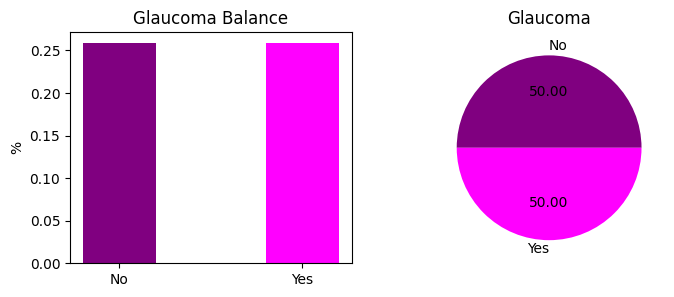

In [9]:
df1 = df.copy()

indices_normal = np.array(df1.query('Glaucoma == 0').index)
indices_glaucoma = np.array(df1.query('Glaucoma == 1').index)

df1.drop(indices_normal[:len(indices_normal)-len(indices_glaucoma)], axis=0, inplace=True)
df1.reset_index(drop=True, inplace=True)


data = {'No': len(df1.query('Glaucoma == 0')) / len(df),
        'Yes': len(df1.query('Glaucoma == 1')) / len(df)
        }

fig = plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
plt.title("Glaucoma Balance")
plt.bar(list(data.keys()), list(data.values()), color=['purple', 'magenta'], width=0.4)
plt.ylabel("%")


plt.subplot(1,2,2)
plt.pie(list(data.values()), colors=['purple', 'magenta'], labels=data.keys(), autopct='%.2f', )
plt.title('Glaucoma')
plt.show()

## Guardamos datos

In [10]:
# 80% of data by train
num_train = int(df1.shape[0]*0.8)

#Train
df_train = df1[:num_train]
df_train.reset_index(drop=True, inplace=True)

#Test
df_test = df1[num_train:]
df_test.reset_index(drop=True, inplace=True)

os.makedirs(f"{folder}/data/oringa_balanced/Train/negative", exist_ok=True)
os.makedirs(f"{folder}/data/oringa_balanced/Train/positive", exist_ok=True)
os.makedirs(f"{folder}/data/oringa_balanced/Test/negative", exist_ok=True)
os.makedirs(f"{folder}/data/oringa_balanced/Test/positive", exist_ok=True)

def create_undersampled_data(data, new_route):
    for i in range(len(data)):
        row = data.loc[i]
        if row.Glaucoma == 0:
            imagen = Image.open(f"{folder}/data/ORIGA/ORIGA/Images/{row.Filename}")
            imagen.save(f"{new_route}/negative/{row.Filename}")
        else:
            imagen = Image.open(f"{folder}/data/ORIGA/ORIGA/Images/{row.Filename}")
            imagen.save(f"{new_route}/positive/{row.Filename}")

train_route = f"{folder}/data/oringa_balanced/Train"
test_route = f"{folder}/data/oringa_balanced/Test"

create_undersampled_data(df_train, train_route) # Train
create_undersampled_data(df_test, test_route) # Test

# cargar dataset Fundus

In [ ]:
TRAIN_DIR = f'{folder}/data/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train'
TEST_DIR = f'{folder}/data/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Validation'

In [ ]:
train_negative = os.listdir(f'{TRAIN_DIR}/Glaucoma_Negative')
train_positive = os.listdir(f'{TRAIN_DIR}/Glaucoma_Positive')

test_negative = os.listdir(f'{TEST_DIR}/Glaucoma_Negative')
test_positive = os.listdir(f'{TEST_DIR}/Glaucoma_Positive')

print('Train negative', len(train_negative))
print('Train positive', len(train_positive))
print('Test negative', len(test_negative))
print('Test positive', len(test_positive))

Train negative 386
Train positive 134
Test negative 96
Test positive 34


Vemos que aqui tampoco esta balanceado el dataset, entonces lo vamos a balancear y creamos nuevo folder con el dataset balanceado

In [ ]:
random_train_negative = list(random.sample(train_negative, 134))
random_test_negative = list(random.sample(test_negative, 34))

In [ ]:
os.makedirs(f"{folder}/data/fundus_ordered/train/negative", exist_ok=True)
os.makedirs(f"{folder}/data/fundus_ordered/train/positive", exist_ok=True)
os.makedirs(f"{folder}/data/fundus_ordered/test/negative", exist_ok=True)
os.makedirs(f"{folder}/data/fundus_ordered/test/positive", exist_ok=True)

def create_undersampled_data(index, origin, destination):
    for i in index:
        imagen = Image.open(f'{origin}/{i}')
        imagen.save(f'{destination}/{i}')

# train negative
create_undersampled_data(
    random_train_negative,
    f'{TRAIN_DIR}/Glaucoma_Negative',
    f'{folder}/data/fundus_ordered/train/negative'
  )

# train positive
create_undersampled_data(
    train_positive,
    f'{TRAIN_DIR}/Glaucoma_Positive',
    f'{folder}/data/fundus_ordered/train/positive'
  )

# test negative
create_undersampled_data(
    random_test_negative,
    f'{TEST_DIR}/Glaucoma_Negative',
    f'{folder}/data/fundus_ordered/test/negative'
)

# test positive
create_undersampled_data(
    test_positive,
    f'{TEST_DIR}/Glaucoma_Positive',
    f'{folder}/data/fundus_ordered/test/positive'
)

In [ ]:
train_negative = os.listdir(f'{folder}/data/fundus_ordered/train/negative')
train_positive = os.listdir(f'{folder}/data/fundus_ordered/train/positive')

test_negative = os.listdir(f'{folder}/data/fundus_ordered/test/negative')
test_positive = os.listdir(f'{folder}/data/fundus_ordered/test/positive')

print('Train negative', len(train_negative))
print('Train positive', len(train_positive))
print('Test negative', len(test_negative))
print('Test positive', len(test_positive))

Train negative 134
Train positive 134
Test negative 34
Test positive 34


Ahora si esta balanceado 🙂